In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from IPython.display import Image

import matplotlib as mpl
mpl.rcParams.update({'font.size': 10})

%matplotlib nbagg

In [2]:
def sin(theta):
    return np.sin(theta*np.pi/180.)

def cos(theta):
    return np.cos(theta*np.pi/180.)

## Load RIXS

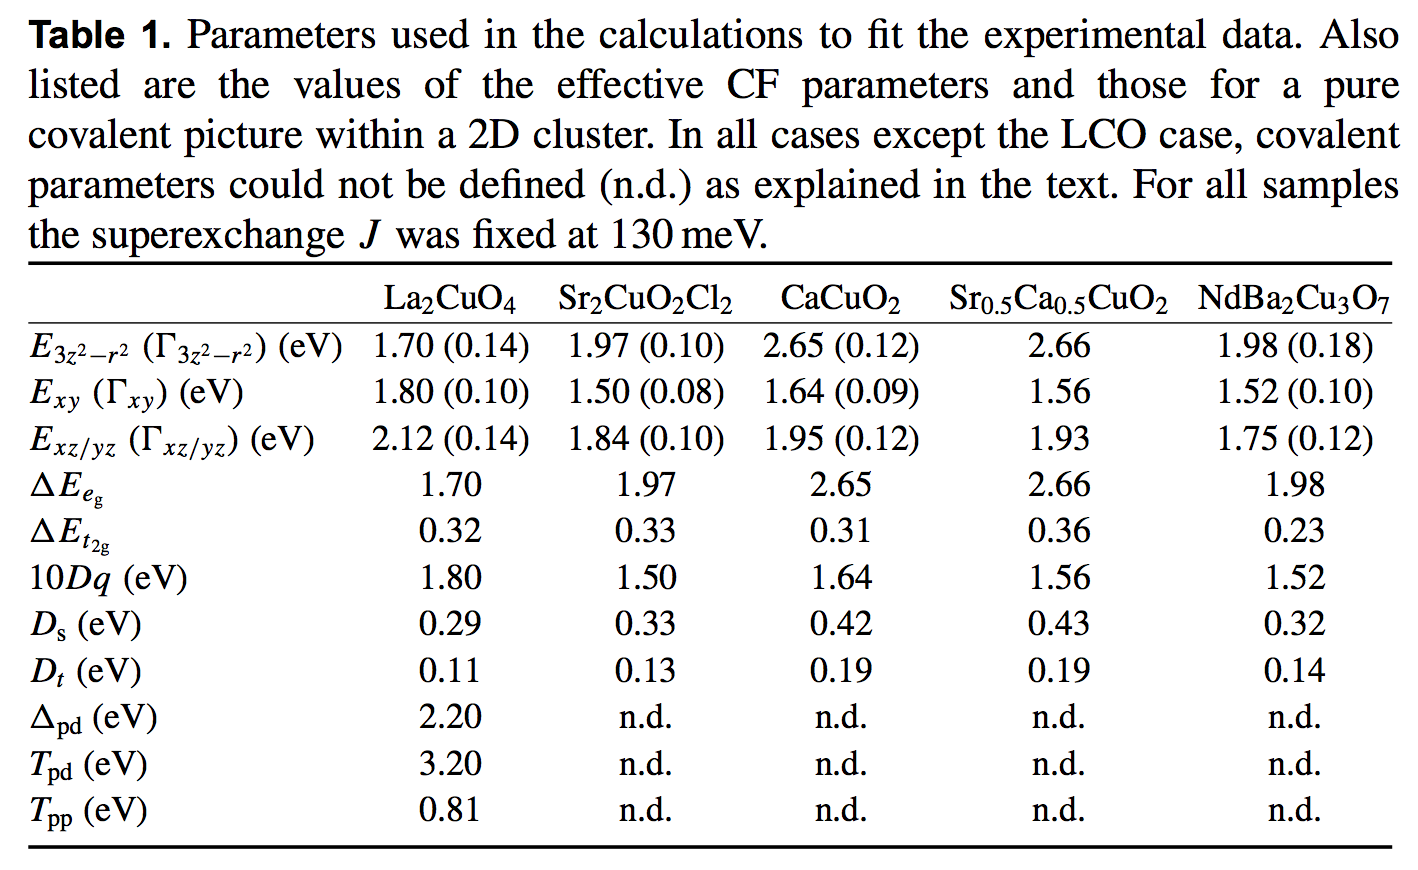

In [3]:
Image('moretti.png')

In [4]:
with open('120meV_exchange/RIXS_pol_11_out.spec') as fin:
    header = [fin.readline() for n in range(4)]

num_spectra = int(header[0][:-1].split(' ')[-1])
Emin1, Emax1 = -7., -3.
E1 = np.linspace(Emin1, Emax1, num_spectra)

file_name = '120meV_exchange/RIXS_pol_{}{}_out.spec'.format(1, 1)
data = np.loadtxt(file_name, skiprows=5)
E2 = data[:,0]
RIXSmap = data[:,2::2]

In [5]:
def get_rixs(out_pol, in_pol):
    cutrow = 300

    file_name = 'zero_exchange/RIXS_pol_{}{}_out.spec'.format(out_pol, in_pol)
    data = np.loadtxt(file_name, skiprows=5)
    RIXSmap0 = -data[:,2::2]
    
    file_name = '120meV_exchange/RIXS_pol_{}{}_out.spec'.format(out_pol, in_pol)
    data = np.loadtxt(file_name, skiprows=5)
    RIXSmap120 = -data[:,2::2]
    
    RIXSmap = np.vstack((RIXSmap120[:cutrow], RIXSmap0[cutrow:]))
    
    return RIXSmap

#def get_rixs(out_pol, in_pol):
#    file_name = 'RIXS_pol_{}{}_out.spec'.format(out_pol, in_pol)
#    data = np.loadtxt(file_name, skiprows=5)
#    RIXSmap = -data[:,2::2]
#        
#    return RIXSmap

pol_iter = [(out_pol, in_pol) for out_pol in range(3) for in_pol in range(3)]
RIXSmaps = [get_rixs(out_pol+1, in_pol+1) for out_pol, in_pol in pol_iter]

<IPython.core.display.Javascript object>


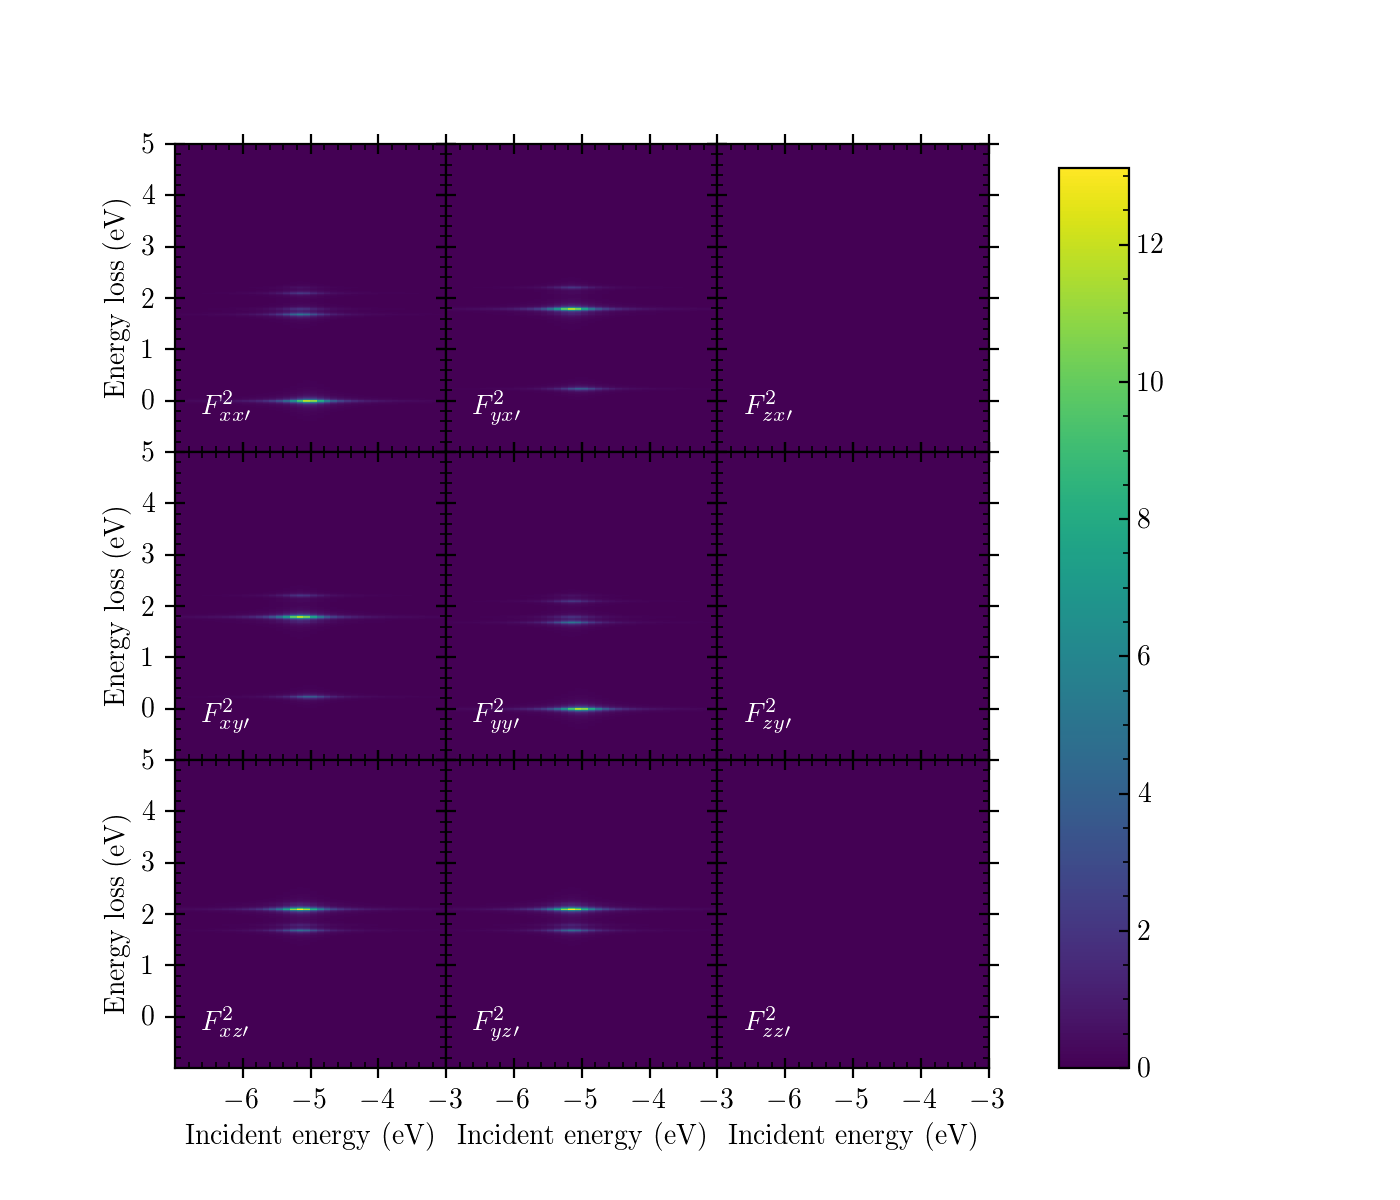

In [6]:
fig = plt.figure(figsize=(7,6))
gs = plt.GridSpec(3, 4)
axs = np.array([fig.add_subplot(gs[out_pol, in_pol]) for out_pol, in_pol in pol_iter])


maxval = max(RIXSmap.max() for RIXSmap in RIXSmaps)

for (out_pol, in_pol), ax, RIXSmap in zip(pol_iter, axs, RIXSmaps):
    art = ax.pcolormesh(E1, E2, RIXSmap, vmin=0, vmax=maxval)
    ax.set_xticks(np.arange(-6,-2))
    ax.set_yticks(np.arange(0,6))
    ax.tick_params(direction='inout', bottom=True, top=True, left=True, right=True, length=7)

[ax.set_xlabel('Incident energy (eV)') for ax, (out_pol, in_pol) in zip(axs, pol_iter) if out_pol == 2]
[ax.set_ylabel('Energy loss (eV)') for ax, (out_pol, in_pol) in zip(axs, pol_iter) if in_pol == 0]
[ax.set_xticklabels('') for ax, (out_pol, in_pol) in zip(axs, pol_iter) if out_pol is not 2]
[ax.set_yticklabels('') for ax, (out_pol, in_pol) in zip(axs, pol_iter) if in_pol is not 0]

xyz = ['x', 'y', 'z']
[ax.text(0.1, 0.1, '$F_{' + xyz[in_pol] + xyz[out_pol] + '\prime}^2$', transform=ax.transAxes, color='w')
 for ax, (out_pol, in_pol) in zip(axs, pol_iter)]

fig.subplots_adjust(wspace=0, hspace=0)
box = axs[8].get_position()
cax = fig.add_axes([box.x1+0.05, box.y0, 0.05, 0.75])
fig.colorbar(art, cax=cax)

## Get XAS

In [7]:
XAS = sum(RIXSmaps).sum(axis=0)
#fig, ax = plt.subplots()
#ax.plot(E1, XAS, '.-')
Eres = E1[np.argmax(XAS)]
print('Resonance at {:.3f}'.format(Eres))

Resonance at -5.200


## Get and plot spectra

<IPython.core.display.Javascript object>


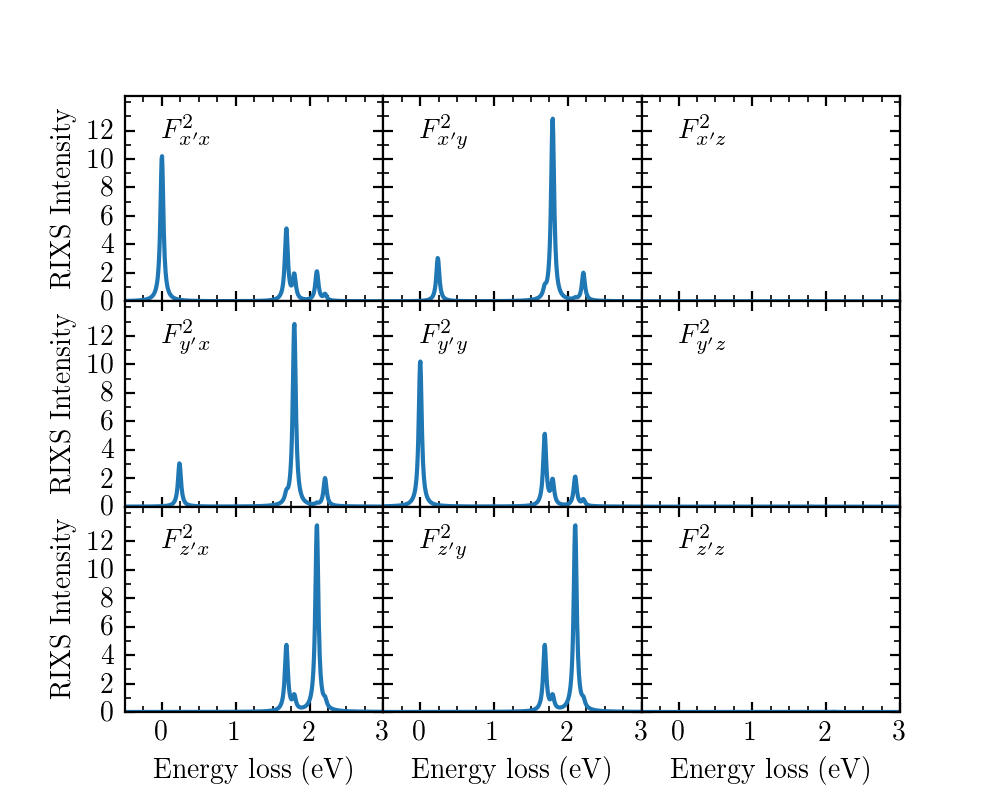

/Users/markdean/anaconda/envs/main/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [10]:
xyz = ['x', 'y', 'z']
fig, axs = plt.subplots(3, 3, figsize=(5.,4))
axs = axs.ravel()

spectra = [RIXSmap[:,np.argmax(XAS)] for RIXSmap in RIXSmaps]
maxval = max(spectrum.max() for spectrum in spectra)

for spectrum, ax, (out_pol, in_pol) in zip(spectra, axs, pol_iter):
    ax.plot(E2, spectrum, '-')
    ax.set_xticks(np.arange(0, 4))
    ax.set_yticks(np.arange(0, 13, 2))
    ax.legend(loc=2)
    ax.axis([-0.5, 3, 0, maxval*1.1])
    #ax.tick_params(which='major', direction='in', bottom=True, top=True, left=True, right=True, length=5)
    #ax.tick_params(which='minor', direction='in', bottom=True, top=True, left=True, right=True, length=2)
    #ax.minorticks_on()
    ax.xaxis.set_minor_locator(MultipleLocator(0.25))
    ax.yaxis.set_minor_locator(MultipleLocator(1))
    
    ax.text(0, 11, '$F_{' + xyz[out_pol] + '^\prime ' + xyz[in_pol] + '}^2$')

[ax.set_xlabel('Energy loss (eV)') for ax, (out_pol, in_pol) in zip(axs, pol_iter) if out_pol == 2]
[ax.set_ylabel('RIXS Intensity') for ax, (out_pol, in_pol) in zip(axs, pol_iter) if in_pol == 0]
[ax.set_xticklabels('') for ax, (out_pol, in_pol) in zip(axs, pol_iter) if out_pol is not 2]
[ax.set_yticklabels('') for ax, (out_pol, in_pol) in zip(axs, pol_iter) if in_pol is not 0]

fig.subplots_adjust(hspace=0, wspace=0)

In [9]:
fig.savefig('Cu_RIXS.pdf', dpi=1200)